## 01-03 Simple Linear Regression

In [60]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch 

torch.manual_seed(0)
torch.__version__

'1.3.0'

人工构造训练数据`y=2x+5`

In [61]:
x = torch.rand(20, 1) * 10
y = 2 * x + 5 + torch.randn(20, 1)
print(x.shape, y.shape)

torch.Size([20, 1]) torch.Size([20, 1])


创建线性回归参数`w`和`b`

In [62]:
w = torch.full((1,), 3, requires_grad=True)
b = torch.zeros((1), requires_grad=True)
print(w.shape, b.shape)

torch.Size([1]) torch.Size([1])


进行梯度下降训练，迭代更新回归参数

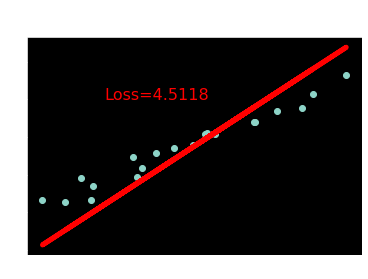

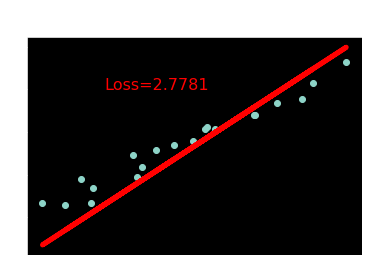

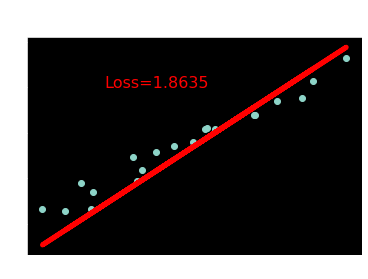

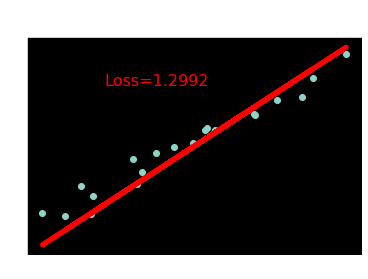

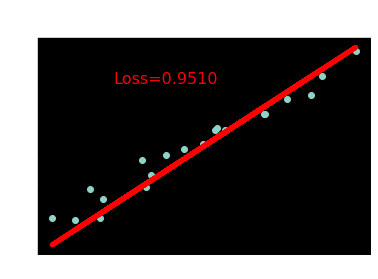

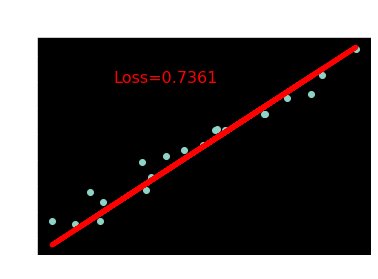

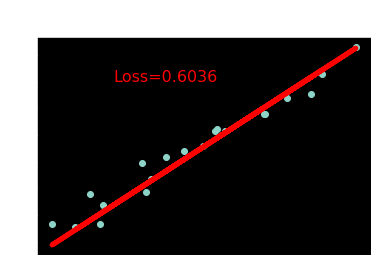

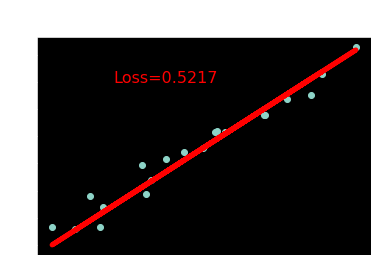

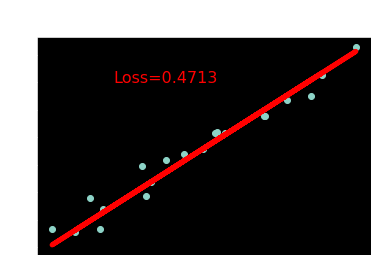

In [63]:
learning_rate = 0.05  # 设定学习率

for iter in range(1000):
    # 前向传播
    y_pred = torch.add(torch.mul(x, w), b)  

    # 计算MSE损失
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)

    # 清空参数的梯度
    w.grad.zero_()
    b.grad.zero_()

    if iter % 20 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 16, 'color': 'red'})
        plt.title(f'Iteration: {iter}\nw: {w.data.numpy()} b:{b.data.numpy()}')
        plt.show()
        
        if loss.data.numpy() < 0.5:
            break